In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

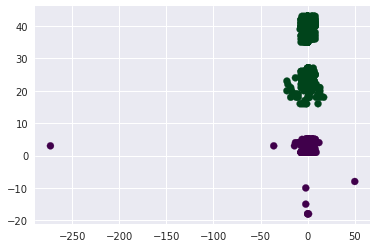

In [2]:
dataset = pd.read_csv("shuttle.csv", header=None).values.astype(np.int32, copy=False)
data_train = dataset[0:int(len(dataset) * 0.6)]
data_test = dataset[int(len(dataset) * 0.6) + 1:]
X, y = np.array([]), np.array([])
for row in dataset:
    if (row[-1] == 4 or row[-1] == 5):
        X = np.vstack((X, [row[3], row[6]])) if len(X) != 0 else [row[3], row[6]]
        y=np.append(y, row[-1]-4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PRGn_r');

### Обучение классификатора

In [3]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

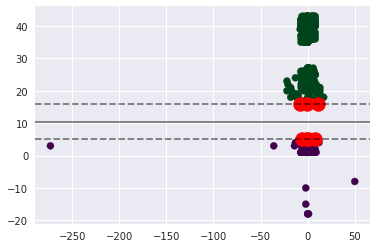

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='PRGn_r')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='red');

### Функции ядра

In [6]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

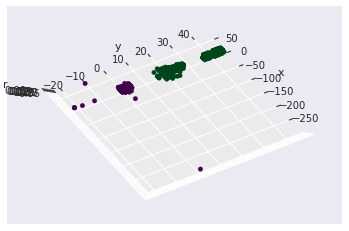

In [8]:
from mpl_toolkits import mplot3d
from IPython.html.widgets import interact

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y,cmap='PRGn_r')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

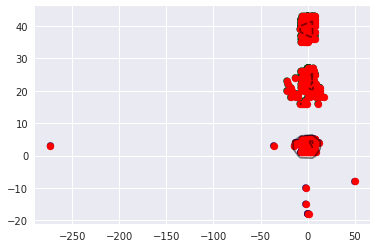

In [9]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PRGn_r')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            facecolors='red');

In [11]:
for kern in ['linear', 'rbf']:
    svc = SVC(kernel=kern)
    svc = svc.fit(data_train[:, :-1], data_train[:, -1])
    svc = svc.score(data_test[:, :-1], data_test[:, -1])
    print(kern, ': ', svc)

linear :  0.982755647525
rbf :  0.931022590102
